# Example Analysis Pipeline 1

Here we present the first of three examples that cover the main analyses performed in the paper. As illustrative cases of study, we use a representative gastruloid dataset to demonstrate the full analysis pipeline, from raw data processing to the extraction of quantitative readouts. The steps shown in this first example are the following: 

- Segmentation and debris removal.
- Analysis using neighborhood information (density, composition).
- Radial distribution of cells using their 3D position and the segmentation of the gastruloid shape.

This example analysis illustrate some of the methods used in the article associated with this repository, including local density, neighborhood composition and radial distributin analysis. YAP and p53 analysis will be considered in examples 2 and 3 respectively.

### Segmentation

First step of the analysis is to perform the segmentation using the `qlivecell`. For more information on that software visit it's github page. In this particular case we are showing, segmentation relies on StarDist. Let's load the relevant packages and the StarDist model we will use.

In [1]:
### LOAD PACKAGE ###
from qlivecell import cellSegTrack, check_or_create_dir, fill_channels

# Set progress to false to not overflow with text the notebook.
import qlivecell.config as cfg
cfg.PROGRESS = False

### LOAD STARDIST MODEL ###
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_fluo')

2026-01-12 20:34:43.563535: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-12 20:34:43.564744: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 20:34:43.583850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-12 20:34:43.584739: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-12 20:34:44.084555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


2026-01-12 20:34:44.808443: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-01-12 20:34:44.811586: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Next, the user must define the direct path to this example folder:

In [ ]:
### PATH TO THE EXAMPLES FOLDER ###
PATH = "path/to/examples/"

With this, we can define the file to which we want to segment and create a folder to store the segmentation results

In [3]:
path_to_data = PATH+"gastruloid1.tif"
path_to_results = PATH+"results_example1/"
check_or_create_dir(path_to_results)
path_to_save = path_to_results+"segmentation"
check_or_create_dir(path_to_save)

Next, we must define the segmentation, concatenation and batch arguments. For the segmentation we use StarDist with a small blur as a preprocessing step (this is done internally on `qlivecell`). For concatenation settings, we define that cells must appear at least on 2 z-planes. Batch settings mainly define the format of the file (.tif in this case) and the main channel of the dataset, which in the case of StarDist segmentation, is going to be the segmented channel. This channels is also used to compute cell centroid.

In [4]:
### DEFINE ARGUMENTS ###
segmentation_args={
    'method': 'stardist2D', 
    'model': model, 
    'blur': [2,1], 
    'min_outline_length':100,
}

concatenation3D_args = {
    'distance_th_z': 3.0, # microns
    'relative_overlap':False, 
    'use_full_matrix_to_compute_overlap':True, 
    'z_neighborhood':2, 
    'overlap_gradient_th':0.3, 
    'min_cell_planes': 2,
}

batch_args = {
    'name_format':"ch"+str(0)+"_{}",
    'extension':".tif",
} 

Now we can initialize the `cellSegTrack` objects which handle the segmentation. In this case, we will initialize two clases, one for the mCherry channel (F3) and one for the emiRFP channel (A12). 

In [5]:
channel_names = ["F3", "A12", "DAPI", "Casp3", "BF"]

ch = channel_names.index("F3")
batch_args['name_format'] = "ch"+str(ch)+"_{}"
chans = fill_channels(channel=ch, channel_names=channel_names)
        
CT_F3 = cellSegTrack(
    path_to_data,
    path_to_save,
    segmentation_args=segmentation_args,
    concatenation3D_args=concatenation3D_args,
    batch_args=batch_args,
    channels=chans
)


ch = channel_names.index("A12")
batch_args['name_format'] = "ch"+str(ch)+"_{}"                
chans = fill_channels(channel=ch, channel_names=channel_names)

CT_A12 = cellSegTrack(
    path_to_data,
    path_to_save,
    segmentation_args=segmentation_args,
    concatenation3D_args=concatenation3D_args,
    batch_args=batch_args,
    channels=chans
)



###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/gastruloid1.tif
#   path to save = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/results_example1/segmentation/
#                                                                    #
#   No tracking method provided. Using greedy algorithm (if needed)  #
#                                                                    #
#   No time step provided, using 1 minute.                           #
#                                                                    #

###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCo

Once the objects are created we can simple run the segmentation. 

In [6]:
CT_F3.run()
CT_A12.run()

###############          BEGIN SEGMENTATIONS          ################
#                                                                    #
#                                                                    #
#   ######   CURRENT TIME = 1/1   ######                             #
#                                                                    #
1/1 [==============================] - 0s 35ms/step
#                                                                    #
#   running concatenation correction... (1/2)                        #
#   concatenation correction completed (1/2)                         #
#   running concatenation correction... (2/2)                        #
#   concatenation correction completed (2/2)                         #
#   running short cell removal...                                    #
#   short cell removal completed                                     #
#   computing attributes...                                          #
#   attributes computed  

Once the segmentation is done, we can load the results in a similar manner. However, in this case we wouldn't need to specify segmentatin and concatenation arguments as we are just going to load the segmentation. 

In [7]:
ch = channel_names.index("F3")
batch_args['name_format'] = "ch"+str(ch)+"_{}"
chans = fill_channels(channel=ch, channel_names=channel_names)
        
CT_F3 = cellSegTrack(
    path_to_data,
    path_to_save,
    batch_args=batch_args,
    channels=chans
)

ch = channel_names.index("A12")
batch_args['name_format'] = "ch"+str(ch)+"_{}"                
chans = fill_channels(channel=ch, channel_names=channel_names)

CT_A12 = cellSegTrack(
    path_to_data,
    path_to_save,
    batch_args=batch_args,
    channels=chans
)
CT_F3.load()
CT_A12.load()


###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/gastruloid1.tif
#   path to save = /home/pablo/Desktop/papers/GastruloidCompetition_paper/cell_competition_gastruloids/image-analysis/examples/results_example1/segmentation/
#                                                                    #
#   No tracking method provided. Using greedy algorithm (if needed)  #
#                                                                    #
#   No time step provided, using 1 minute.                           #
#                                                                    #

###############           INIT ON BATCH MODE          ################
#                                                                    #
#   path to data = /home/pablo/Desktop/papers/GastruloidCo

### Debris removal

Once we have our segmentation results are loaded, we can proceed with the post-processing. In this case, we will remove debris that might have been erroniously segmented. For that, we compute a threshold based on the distribution of areas at the center plane of the segmented objects. We define the threshold as the local minina in a Kernel Density Estimation of the distribution of areas.

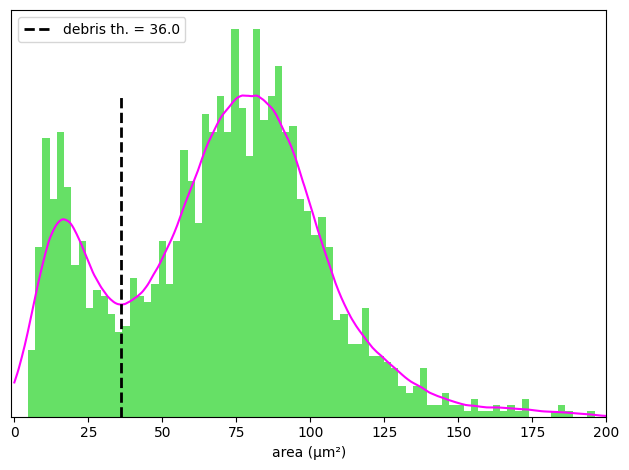

In [8]:
areas = []
for cell in CT_F3.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)

    mask = cell.masks[0][zcid]
    area = len(mask) * CT_F3.metadata["XYresolution"]**2
    areas.append(area)
    
for cell in CT_A12.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)

    mask = cell.masks[0][zcid]
    area = len(mask) * CT_A12.metadata["XYresolution"]**2
    areas.append(area)
    

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots()
data = np.array(areas)
data = np.clip(data, 0, 250)
x = np.arange(0, step=0.5, stop=np.max(data))
bw = 15
modelo_kde = KernelDensity(kernel="linear", bandwidth=bw)
modelo_kde.fit(X=data.reshape(-1, 1))
densidad_pred = np.exp(modelo_kde.score_samples(x.reshape((-1, 1))))
local_minima = argrelextrema(densidad_pred, np.less)[0]
threshold = x[local_minima[0]]
x_th = np.ones(len(x)) * x[local_minima[0]]
y_th = np.linspace(0, np.max(densidad_pred), num=len(x))

ax.hist(data, bins=100, color=[0.0, 0.8, 0.0], density=True, alpha=0.6)
ax.plot(x, densidad_pred, color="magenta")
ax.plot(x_th, y_th, c="k", ls="--",lw=2, label="debris th. = {:0.1f}".format(threshold))
ax.set_xlim(-1,200)
ax.set_xlabel("area (µm²)")
ax.set_yticks([])
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()


Once we have our threshold defined, we remove the objects whose area is below the threshold

In [9]:
labs_to_rem = []
for cell in CT_F3.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)
    mask = cell.masks[0][zcid]
    area = len(mask) * CT_F3.metadata["XYresolution"]**2
    if area < threshold:
        labs_to_rem.append(cell.label)

debris_F3 = len(labs_to_rem)
for lab in labs_to_rem:
    CT_F3._del_cell(lab)   
    
CT_F3.update_labels()

labs_to_rem = []
for cell in CT_A12.jitcells:
    zc = int(cell.centers[0][0])
    zcid = cell.zs[0].index(zc)
    mask = cell.masks[0][zcid]
    area = len(mask)* CT_A12.metadata["XYresolution"]**2
    if area < threshold:
        labs_to_rem.append(cell.label)
    
debris_A12 = len(labs_to_rem)
for lab in labs_to_rem:
    CT_A12._del_cell(lab)  
    
CT_A12.update_labels()

With this, the segmentation results are ready to be used in posterior analysis. First thing we can draw from this result is the amount of cells and debris on each of the populations segmented

In [10]:
print("Number of mCherry cells:", len(CT_F3.jitcells))
print("Number of debris objects on the mCherry channel:", debris_F3)
print("Number of emiRFP cells:", len(CT_A12.jitcells))
print("Number of debris objects on the emiRFP channel:", debris_A12)

Number of mCherry cells: 754
Number of debris objects on the mCherry channel: 183
Number of emiRFP cells: 545
Number of debris objects on the emiRFP channel: 166


With this, we can move on with more complex analysis starting with those based on neighborhood analysis.

### Local Density Analysis

Using the segmentation results we can extract the centroids of the cells and estimate their local neighborhood using the distances to their neighborhood. To compute the neighborhood per cell, we use K-Nearest Neighbors (KNN).

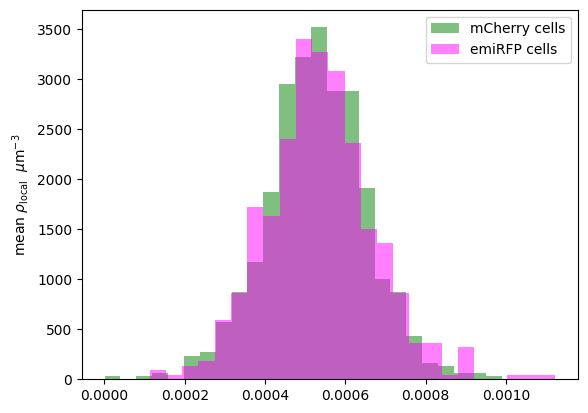

In [11]:
from sklearn.neighbors import NearestNeighbors

number_of_neighs = 15
zres = CT_F3.metadata["Zresolution"]
xyres = CT_F3.metadata["XYresolution"]

fates = []
centers = []
for cell in CT_F3.jitcells:
    fates.append(0)
    centers.append(cell.centers[0]*[zres, xyres, xyres])
for cell in CT_A12.jitcells:
    fates.append(1)
    centers.append(cell.centers[0]*[zres, xyres, xyres])
    
centers = np.array(centers)
fates = np.array(fates)

nbrs = NearestNeighbors(n_neighbors=number_of_neighs+1, algorithm='ball_tree').fit(centers)
distances, neighs = nbrs.kneighbors(centers)

true_neighs = []
true_dists = []
for p, neigh_p in enumerate(neighs):
    true_neigh_p = []
    true_dists_p = []
    for neigh in neigh_p[1:]:
        dist = np.linalg.norm(centers[p]-centers[neigh])
        true_dists_p.append(dist)
        true_neigh_p.append(neigh)
        if len(true_neigh_p) == number_of_neighs: break
    true_dists.append(true_dists_p)
    true_neighs.append(true_neigh_p)

densities = [1/(np.mean(dists))**3 for dists in true_dists]

densities_F3 = [densities[n] for n in range(len(fates)) if fates[n] == 0]
densities_A12 = [densities[n] for n in range(len(fates)) if fates[n] == 1]

fig, ax = plt.subplots()
ax.hist(densities_F3, color="green", bins=25, alpha=0.5,label="mCherry cells", density=True)
ax.hist(densities_A12, color="magenta", bins=25, alpha=0.5,label="emiRFP cells", density=True)
ax.set_ylabel(r"mean $\rho_\mathrm{{local}}$  $\mu \mathrm{{m}}^{{-3}}$")
plt.legend()
plt.show()

### Neighborhood Composition Analysis

Next, using a similar methology as in the previous example, that is KNN, we will compute the neighborhood composition for each cell in the gastruloid. And compare the results from the mCherry and emiRFP segmented cells.

In [12]:
from sklearn.neighbors import NearestNeighbors

number_of_neighs = 15
zres = CT_F3.metadata["Zresolution"]
xyres = CT_F3.metadata["XYresolution"]

fates = []
centers = []
for cell in CT_F3.jitcells:
    fates.append(0)
    centers.append(cell.centers[0]*[zres, xyres, xyres])
for cell in CT_A12.jitcells:
    fates.append(1)
    centers.append(cell.centers[0]*[zres, xyres, xyres])
    
centers = np.array(centers)
fates = np.array(fates)

nbrs = NearestNeighbors(n_neighbors=number_of_neighs+1, algorithm='ball_tree').fit(centers)
distances, neighs = nbrs.kneighbors(centers)

true_neighs = []
true_dists = []
for p, neigh_p in enumerate(neighs):
    true_neigh_p = []
    true_dists_p = []
    for neigh in neigh_p[1:]:
        dist = np.linalg.norm(centers[p]-centers[neigh])
        true_dists_p.append(dist)
        true_neigh_p.append(neigh)
        if len(true_neigh_p) == number_of_neighs: break
    true_dists.append(true_dists_p)
    true_neighs.append(true_neigh_p)

neighs_fates = []
for p, neigh_p in enumerate(true_neighs):
    lbs = []
    fts = []
    for neigh in neigh_p:
        fts.append(fates[neigh])
    neighs_fates.append(fts)

neighs_fates_F3 = [n for i,n in enumerate(neighs_fates) if fates[i] == 0]
neighs_fates_A12 = [n for i,n in enumerate(neighs_fates) if fates[i] == 1]

neighs_fates_F3_sum = np.zeros(2)
neighs_fates_A12_sum = np.zeros(2)

for n_fates in neighs_fates_F3:
    for _f in n_fates:
        if _f in [0]:
            neighs_fates_F3_sum[0] += 1
        elif _f in [1]:
            neighs_fates_F3_sum[1] += 1
            
for n_fates in neighs_fates_A12:
    for _f in n_fates:
        if _f in [0]:
            neighs_fates_A12_sum[0] += 1
        elif _f in [1]:
            neighs_fates_A12_sum[1] += 1



Once the neighbors fate are extracted for each cell, we can compute the neighborhood proportion for each cells and display the results.

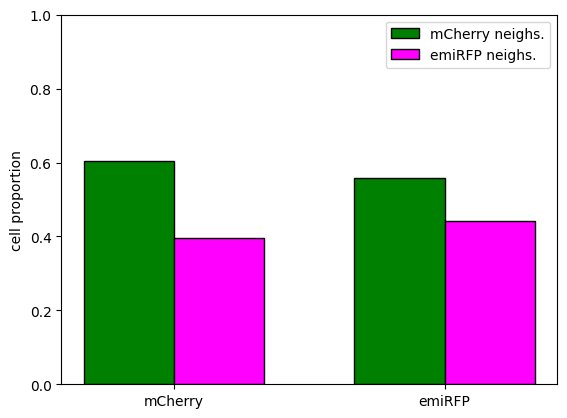

In [13]:
neighs_fates_F3_sum /= np.sum(neighs_fates_F3_sum)
neighs_fates_A12_sum /= np.sum(neighs_fates_A12_sum)

x = np.arange(2)*1.5
barwidth = 0.5
offset = barwidth/2

fig, ax = plt.subplots()
ax.bar(x - offset, np.array([neighs_fates_F3_sum[0],neighs_fates_A12_sum[0]]) , barwidth, label="mCherry neighs.", color="green", edgecolor="k")
ax.bar(x + offset, np.array([neighs_fates_F3_sum[1],neighs_fates_A12_sum[1]]), barwidth, label="emiRFP neighs.", color="magenta", edgecolor="k")
ax.set_ylim(0,1)
ax.set_ylabel("cell proportion")
ax.set_xticks(x)
ax.set_xticklabels(["mCherry", "emiRFP"])
plt.legend()
plt.show()

As seen in the figure, the composititions tend towards the mCherry cells. This is because there are more mCherry cells in this particular gastruloid. For easier interpretation of the results, we normalized by the total number of cells in each populations as seen below.

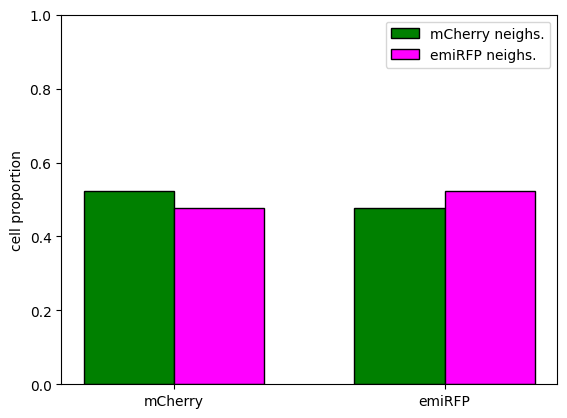

In [14]:
total_f3s = len(CT_F3.jitcells)
total_a12s = len(CT_A12.jitcells)
f3_a12_norm = np.array([total_f3s, total_a12s])

neighs_fates_F3_sum = np.zeros(2)
neighs_fates_A12_sum = np.zeros(2)

for n_fates in neighs_fates_F3:
    for _f in n_fates:
        if _f in [0]:
            neighs_fates_F3_sum[0] += 1
        elif _f in [1]:
            neighs_fates_F3_sum[1] += 1
            
for n_fates in neighs_fates_A12:
    for _f in n_fates:
        if _f in [0]:
            neighs_fates_A12_sum[0] += 1
        elif _f in [1]:
            neighs_fates_A12_sum[1] += 1

neighs_fates_F3_sum /= f3_a12_norm
neighs_fates_F3_sum /= np.sum(neighs_fates_F3_sum)
neighs_fates_A12_sum /= f3_a12_norm
neighs_fates_A12_sum /= np.sum(neighs_fates_A12_sum)

x = np.arange(2)*1.5
barwidth = 0.5
offset = barwidth/2

fig, ax = plt.subplots()
ax.bar(x - offset, np.array([neighs_fates_F3_sum[0],neighs_fates_A12_sum[0]]) , barwidth, label="mCherry neighs.", color="green", edgecolor="k")
ax.bar(x + offset, np.array([neighs_fates_F3_sum[1],neighs_fates_A12_sum[1]]), barwidth, label="emiRFP neighs.", color="magenta", edgecolor="k")
ax.set_ylim(0,1)
ax.set_ylabel("cell proportion")
ax.set_xticks(x)
ax.set_xticklabels(["mCherry", "emiRFP"])
plt.legend()
plt.show()

After normalization, we see each cell type tends to be more surrounded by cells of it's same type. This is an expected results as when cells divide they add a neighbor of it's same cell type to their neighborhood. Despite this, we can see from the results that both populations are well mixed. 

### Radial Distribution Analysis

Finally, also using the 3D positions of the cells and the the contour of the gastruloid, we can estimate the spatial distribution of cells in the gastruloid. For this, we designed a metric based on the relative position of the cells with respect to the centroid and the nearest gastruloid contour point. 

First step is to segment the contour of the gastruloid at each plane.

t = 0
z = 3
z = 4
z = 5
z = 6
z = 7
z = 8
z = 9
z = 10
z = 11
z = 12
z = 13
z = 14
z = 15
z = 16
z = 17
z = 18
z = 19
z = 20
z = 21
z = 22
z = 23
z = 24
z = 25
z = 26
z = 27
z = 28
z = 29
z = 30
z = 31
z = 32
z = 33
z = 34
z = 35
z = 36
z = 37
z = 38
z = 39
z =
 40z = 41
z = 42
z = 43
z = 44
z = 45
z = 46
z = 47
z = 48
z = 49
z = 50
z = 51
z = 52
z = 53
z = 54
z = 55
z = 56
z = 57
z = 58
z = 59
z = 60
z = 61
z = 62
z = 63
z = 64
z = 65
z = 66
z = 67
z = 68
z = 69
z = 70
z = 71
z = 72
z = 73
z = 74


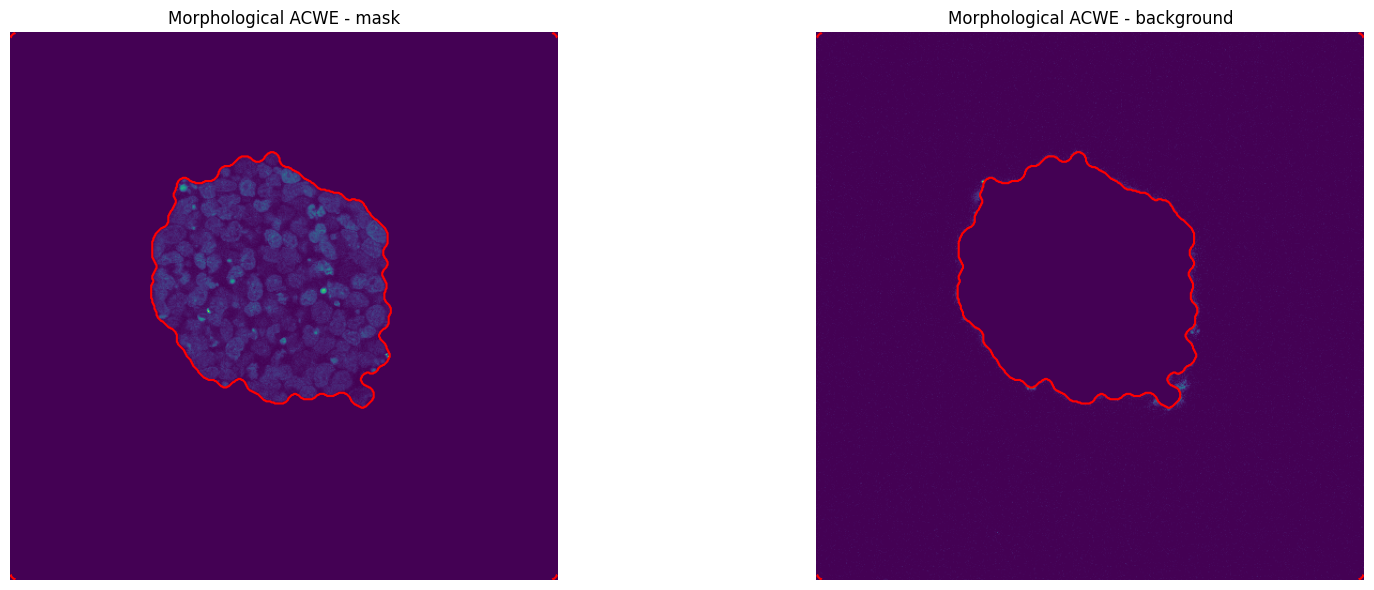

In [15]:
from qlivecell import EmbryoSegmentation, tif_reader_5D
hyperstack, metadata = tif_reader_5D(path_to_data)
ch_F3 = channel_names.index("F3")
ch_A12 = channel_names.index("A12")
channels_seg = np.array([ch_A12, ch_F3])
hyperstack_seg = np.sum(hyperstack[:,:,channels_seg, :, :].astype("int32"), axis=2)

centers = []
for cell in CT_F3.jitcells:
    centers.append(cell.centers[0])
for cell in CT_A12.jitcells:
    centers.append(cell.centers[0])
centers = np.array(centers)

minz = int(np.min(centers[:,0]))
maxz = int(np.max(centers[:,0]))
z_plot = np.rint(hyperstack_seg.shape[1]/2).astype("int64")

ES = EmbryoSegmentation(
        hyperstack_seg,
        ksize=5,
        ksigma=20,
        binths=7.5,
        apply_biths_to_zrange_only=False,
        checkerboard_size=10,
        num_inter=100,
        smoothing=20,
        trange=None,
        zrange=range(minz, maxz+1),
        mp_threads=1,
    )

ES(hyperstack_seg)
ES.plot_segmentation(0, z_plot)
plt.show()

Above, we have ploted an example of the contour on a single plane. On the left is what will be considered the embryo, on the right, the outside of the embryo. Now, we can compute already the relative positions of cells and display the results. For that, we first show an example of how does it look for a single cell. 

got contours


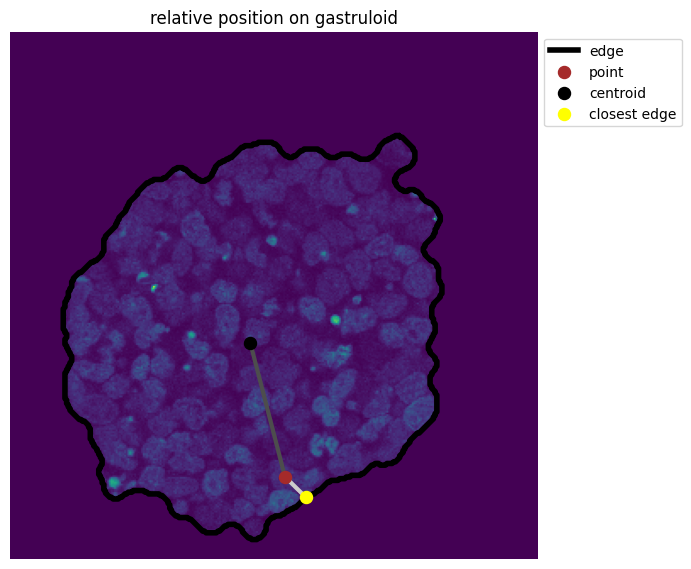

In [16]:
from skimage import measure
from qlivecell import compute_dists_jit, compute_distance_xy_jit

contour_points2D = []
for zid, z in enumerate(range(z_plot, z_plot+1)):
    contours = measure.find_contours(ES.LS[0][z-minz], 0.5)
    contour = []
    for cont in contours:
        if len(cont)>len(contour):
            contour = cont
    for p in contour:
        contour_points2D.append(np.array([p[1], p[0]]))
contour_points2D = np.array(contour_points2D)

print("got contours")

centers_all = []
for cell in CT_F3.jitcells:
    if z_plot in cell.zs[0]:
        zid = cell.zs[0].index(z_plot)
        centers_all.append(cell.centers_all[0][zid])

for cell in CT_A12.jitcells:
    if z_plot in cell.zs[0]:
        zid = cell.zs[0].index(z_plot)
        centers_all.append(cell.centers_all[0][zid])
centers_all = np.array(centers_all)

point_inside=centers_all[2][1:]
dists = compute_dists_jit(np.array([point_inside]), np.array(contour_points2D), compute_distance_xy_jit)
closest = np.argmin(dists, axis=1)
point_contour = contour_points2D[closest][0]
centroid2D = np.mean(centers_all, axis=0)[1:]

fig, ax = plt.subplots(figsize=(7,7))
# Plot the ellipse
ax.imshow(ES.Emb[0][z_plot-minz])
ax.plot(contour_points2D[:, 0], contour_points2D[:, 1], ls='-', label='edge', c='k', lw=4)
ax.plot([point_inside[0], point_contour[0]], [point_inside[1], point_contour[1]], c=[0.8,0.8,0.8], lw=3)
ax.plot([point_inside[0], centroid2D[0]], [point_inside[1], centroid2D[1]], c=[0.3,0.3,0.3], lw=3)
ax.scatter([point_inside[0]], [point_inside[1]], s=75, label="point", color="brown", zorder=10)
ax.scatter([centroid2D[0]], [centroid2D[1]], s=75, label="centroid", color="k", zorder=10)
ax.scatter([point_contour[0]], [point_contour[1]], s=75, label="closest edge", color="yellow", zorder=10)

ax.set_title('relative position on gastruloid')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.0))
ax.set_aspect('equal')
ax.spines[['bottom','left', 'right', 'top']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(100, 512-100)
ax.set_ylim(100, 512-100)
plt.tight_layout()
plt.show()

Finally, we compute the metric for all cells in the gastruloids and show the results for the mCherry and emiRFP cells separately. 

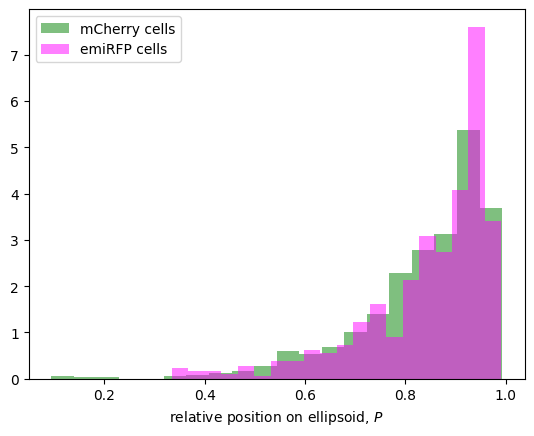

In [17]:
from qlivecell import compute_distance_xyz_jit, compute_dists_jit

centroid3D = np.mean(centers_all, axis=0)

contour_points3D = []
for zid, z in enumerate(range(minz, maxz+1)):
    contours = measure.find_contours(ES.LS[0][zid], 0.5)
    contour = []
    # Select the largest contour as the gastruloid contour
    for cont in contours:
        if len(cont)>len(contour):
            contour = cont
    for p in contour:
        contour_points3D.append(np.array([z, p[1], p[0]]))
contour_points3D = np.array(contour_points3D)

centers_A12 = []

for cell in CT_A12.jitcells:
    centers_A12.append(cell.centers[0])
centers_A12 = np.array(centers_A12)

centers_F3 = []
for cell in CT_F3.jitcells:
    centers_F3.append(cell.centers[0])
centers_F3 = np.array(centers_F3)

dists_A12 = compute_dists_jit(np.array(centers_A12), np.array(contour_points3D), compute_distance_xyz_jit)
closests_A12_ids = np.argmin(dists_A12, axis=1)
closests_contour_points_A12 = np.array([contour_points3D[i] for i in closests_A12_ids])

dists_F3 = compute_dists_jit(np.array(centers_F3), np.array(contour_points3D), compute_distance_xyz_jit)
closests_F3_ids = np.argmin(dists_F3, axis=1)
closests_contour_points_F3 = np.array([contour_points3D[i] for i in closests_F3_ids])

dists_contour_A12_current = np.array([dists_A12[i, closests_A12_ids[i]] for i in range(len(centers_A12))])
dists_contour_F3_current = np.array([dists_F3[i, closests_F3_ids[i]] for i in range(len(centers_F3))])

dists_centroid_A12_current = np.array([compute_distance_xyz_jit(center, centroid3D) for center in centers_A12])
dists_centroid_F3_current = np.array([compute_distance_xyz_jit(center, centroid3D) for center in centers_F3])

metric_F3 = dists_centroid_F3_current / (dists_centroid_F3_current + dists_contour_F3_current)
metric_A12 = dists_centroid_A12_current / (dists_centroid_A12_current + dists_contour_A12_current)

fig, ax = plt.subplots()
ax.hist(metric_F3, color="green", bins=20, alpha=0.5,label="mCherry cells", density=True)
ax.hist(metric_A12, color="magenta", bins=20, alpha=0.5,label="emiRFP cells", density=True)
ax.set_xlabel(r"relative position on ellipsoid, $P$")
plt.legend()
plt.show()

End of the Notebook.